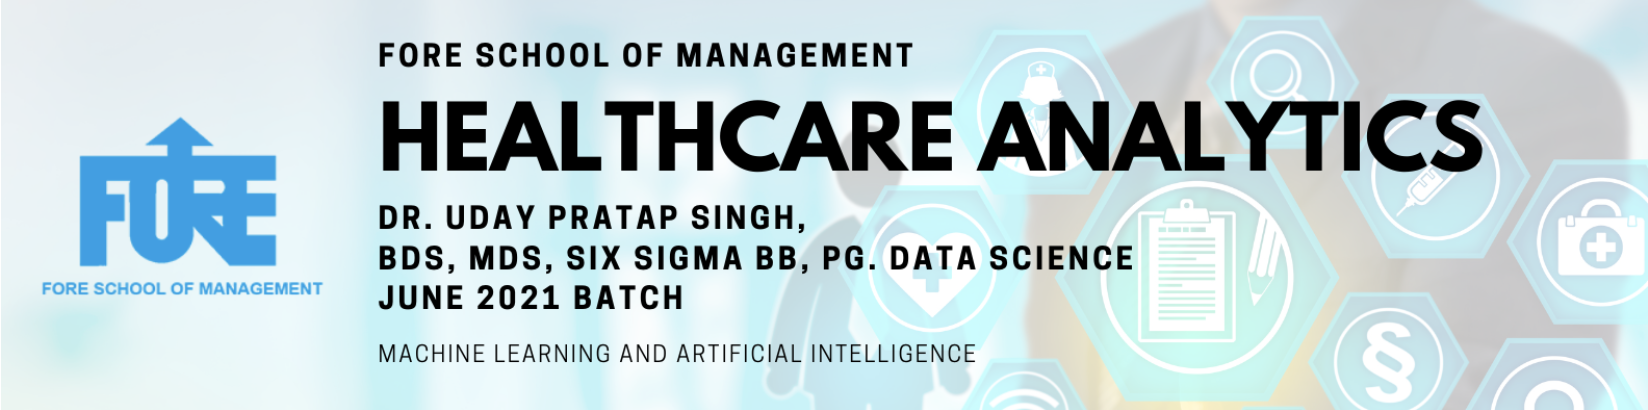

## Importing Libraries

In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

## Importing the dataset

In [71]:
# Import training dataset
d = pd.read_csv('train.csv')

In [3]:
# Overview of the data
d.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Setting up the dataset for the model

In [72]:
# Categories in 'cholesterol'
d['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [73]:
# Changing 'cholesterol' to object type
d['cholesterol'] = d['cholesterol'].astype(object)

In [74]:
# Categories in 'gluc'
d['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [75]:
# Changing 'gluc' to object type
d['gluc'] = d['gluc'].astype(object)

In [68]:
# Categories in 'smoke'
d['smoke'].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

In [70]:
# Categories in 'alco'
d['alco'].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [76]:
# Categories in 'active'
d['active'].value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [77]:
# Separating categorical and numerical data types
categorical = list(d.dtypes[d.dtypes == object].index)
numerical = list(d.dtypes[d.dtypes != object].index)

In [81]:
# dropping 'id' column
d_dummified.drop('id', axis = 1, inplace = True)

In [79]:
# Converting object type data types into their dummies and viewing the data
d_cat = d[categorical]
d_dummies = pd.get_dummies(d_cat,drop_first=True)
d_dummified = pd.concat([d[numerical],d_dummies],axis=1)
d_dummified.head()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0,18393,2,168,62.0,110,80,0,0,1,0,0,0,0,0
1,1,20228,1,156,85.0,140,90,0,0,1,1,0,1,0,0
2,2,18857,1,165,64.0,130,70,0,0,0,1,0,1,0,0
3,3,17623,2,169,82.0,150,100,0,0,1,1,0,0,0,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0,0


## Overview of the data

In [82]:
# Shape of the data
d_dummified.shape

(70000, 14)

In [83]:
# Data info
d_dummified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            70000 non-null  int64  
 1   gender         70000 non-null  int64  
 2   height         70000 non-null  int64  
 3   weight         70000 non-null  float64
 4   ap_hi          70000 non-null  int64  
 5   ap_lo          70000 non-null  int64  
 6   smoke          70000 non-null  int64  
 7   alco           70000 non-null  int64  
 8   active         70000 non-null  int64  
 9   cardio         70000 non-null  int64  
 10  cholesterol_2  70000 non-null  uint8  
 11  cholesterol_3  70000 non-null  uint8  
 12  gluc_2         70000 non-null  uint8  
 13  gluc_3         70000 non-null  uint8  
dtypes: float64(1), int64(9), uint8(4)
memory usage: 5.6 MB


In [84]:
# Brief description of the data
d_dummified.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0
active,70000.0,0.803729,0.397179,0.0,1.0,1.0,1.0,1.0
cardio,70000.0,0.499700,0.500003,0.0,0.0,0.0,1.0,1.0


## Bulding the model

In [86]:
# Taking a copy of the dataset
d1 = d_dummified.copy()

In [59]:
# Segregating dependent and independent variables
y = d1['cardio']
x = d1.drop(['cardio'], axis=1)

In [13]:
# Splitting the dataset into 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=0)

In [14]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (49000, 12)
x_test:  (21000, 12)
y_train:  (49000,)
y_test:  (21000,)


In [16]:
# Normalising the dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [17]:
# Applying the transformation logic to test data using training data
x_test = sc.transform(x_test)

In [121]:
# Setting up the model
clf = MLPClassifier(hidden_layer_sizes=[100,50,10], max_iter=5000, activation = 'tanh',# learning_rate = 'adaptive',
                     solver='sgd', verbose=True,  random_state=21, tol=0.0001)

In [122]:
# Fitting the model
clf.fit(x_train, y_train)

Iteration 1, loss = 0.64530783
Iteration 2, loss = 0.61591880
Iteration 3, loss = 0.60969815
Iteration 4, loss = 0.60403907
Iteration 5, loss = 0.59844042
Iteration 6, loss = 0.59266068
Iteration 7, loss = 0.58704838
Iteration 8, loss = 0.58183550
Iteration 9, loss = 0.57697181
Iteration 10, loss = 0.57295749
Iteration 11, loss = 0.56981061
Iteration 12, loss = 0.56709426
Iteration 13, loss = 0.56530670
Iteration 14, loss = 0.56370441
Iteration 15, loss = 0.56240223
Iteration 16, loss = 0.56155603
Iteration 17, loss = 0.56065431
Iteration 18, loss = 0.56017394
Iteration 19, loss = 0.55979962
Iteration 20, loss = 0.55953054
Iteration 21, loss = 0.55907276
Iteration 22, loss = 0.55876598
Iteration 23, loss = 0.55849178
Iteration 24, loss = 0.55798131
Iteration 25, loss = 0.55780890
Iteration 26, loss = 0.55769346
Iteration 27, loss = 0.55749386
Iteration 28, loss = 0.55718730
Iteration 29, loss = 0.55683805
Iteration 30, loss = 0.55654162
Iteration 31, loss = 0.55637267
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=[100, 50, 10],
              max_iter=5000, random_state=21, solver='sgd', verbose=True)

In [123]:
# Predicting using the trained model
y_pred = clf.predict(x_train)

## Predicting using the trained model

In [126]:
# COnfusion matrix
confusion_matrix(y_train,y_pred)

array([[18849,  5633],
       [ 7271, 17247]])

In [125]:
# Classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     24482
           1       0.75      0.70      0.73     24518

    accuracy                           0.74     49000
   macro avg       0.74      0.74      0.74     49000
weighted avg       0.74      0.74      0.74     49000



AUC: 0.793


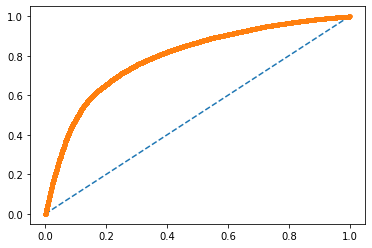

In [119]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## The End